In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import os
import time

output_dir = "C:/Users/Admin/Desktop/project/Projekt-pogoda/pobrane"
output_dir_unzip = "C:/Users/Admin/Desktop/project/Projekt-pogoda/pobrane_unzip"

os.makedirs(output_dir, exist_ok=True)
os.makedirs(output_dir_unzip, exist_ok=True)

for year in range(2001, 2024):
    for month in range(1, 13):
        filename = f"dane_{year}_{month:02d}.zip"
        url = f"https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/{year}/{year}_{month:02d}_k.zip"

        print(f"Pobieranie: {url}")

        os.system(f'powershell Invoke-WebRequest -Uri "{url}" -OutFile "{output_dir}/{filename}"')
        os.system(f'powershell Expand-Archive -Path "{output_dir}/{filename}" -Force -DestinationPath "{output_dir_unzip}"')
        time.sleep(1)

        for file in os.listdir(f"{output_dir_unzip}"):
            if file.startswith('k_d_t'):
                os.remove(f"{output_dir_unzip}/{file}")

Pobieranie: https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/2001/2001_01_k.zip
Pobieranie: https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/2001/2001_02_k.zip
Pobieranie: https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/2001/2001_03_k.zip
Pobieranie: https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/2001/2001_04_k.zip
Pobieranie: https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/2001/2001_05_k.zip
Pobieranie: https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/2001/2001_06_k.zip
Pobieranie: https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/2001/2001_07_k.zip
Pobieranie: https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/d

PermissionError: [WinError 5] Odmowa dostępu: 'C:/Users/Admin/Desktop/project/Projekt-pogoda/pobrane'

In [2]:
output = r"C:/Users/Admin/Desktop/project/Projekt-pogoda/data.csv"
base_dir = r"C:/Users/Admin/Desktop/project/Projekt-pogoda/pobrane_unzip"

first = True

for year in range(2001, 2024):
    for month in range(1, 13):
        plik = f"k_d_{month:02d}_{year}.csv"
        folder = os.path.join(base_dir, plik)

        if os.path.exists(folder):
            df = pd.read_csv(folder, header=None, encoding='cp1250')

            df.to_csv(
                output,
                mode="w" if first else "a",
                index=False,
                header=None,
                encoding='utf-8'
            )
            first = False


NameError: name 'os' is not defined

In [3]:
df = pd.read_csv('data.csv', header=None, usecols=[1, 2, 3, 4, 5, 7, 9])
df.to_csv(
                output,
                mode="w",
                index=False,
                header=None,
            )

ParserError: Defining usecols with out-of-bounds indices is not allowed. [7, 9] are out of bounds.

In [4]:
df = pd.read_csv('data.csv', header=None)
df.columns = ['Stacja', 'Rok', 'Miesiąc', 'Dzień', 'Maksymalna temperatura', 'Minimalna temperatura', 'Średnia temperatura']
df

,Stacja,Rok,Miesiąc,Dzień,Maksymalna temperatura,Minimalna temperatura,Średnia temperatura
0,PSZCZYNA,2001,1,1,-1.3,-9.6,-5.7
1,PSZCZYNA,2001,1,2,3.3,-12.0,-2.7
2,PSZCZYNA,2001,1,3,1.5,-5.7,-1.5
3,PSZCZYNA,2001,1,4,6.5,-1.1,1.9
4,PSZCZYNA,2001,1,5,6.5,-2.3,2.8
...,...,...,...,...,...,...,...
1031401,OLECKO,2023,12,27,5.9,0.2,2.1
1031402,OLECKO,2023,12,28,3.9,-1.4,1.4
1031403,OLECKO,2023,12,29,5.9,3.0,4.5
1031404,OLECKO,2023,12,30,6.4,3.3,4.5


In [ ]:
full_city = df[df["Stacja"].isin(["DOLINA PIĘCIU STAWÓW"])]

previous_temp = None
avr_temp = []
for temp in full_city["Średnia temperatura"]:
    if previous_temp == None:
        previous_temp = temp
        avr_temp.append(temp)
    else:
        avr_temp.append((previous_temp+temp)/2)
        previous_temp = avr_temp[-1]


In [33]:
full_city = df[df["Stacja"].isin(["DOLINA PIĘCIU STAWÓW"])]

previous_temp = None
avr_temp = []
for temp in full_city["Średnia temperatura"]:
    if previous_temp == None:
        previous_temp = temp
        avr_temp.append(temp)
    else:
        previous_temp = (previous_temp + temp) / 2
        avr_temp.append(previous_temp)

In [ ]:
running_sum = 0
count = 0
running_avr_temp = []

for temp in full_city["Średnia temperatura"]:
    running_sum += temp
    count += 1
    current_mean = running_sum / count
    running_avr_temp.append(current_mean)

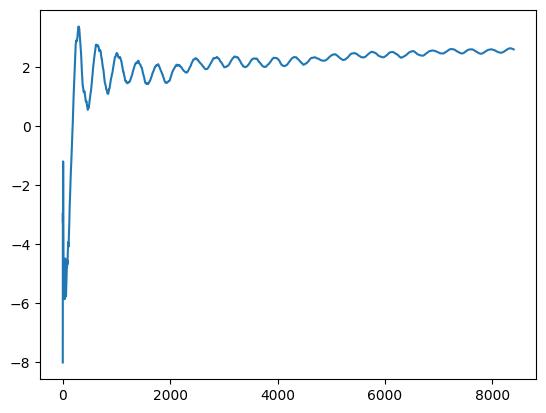

In [ ]:
plt.plot(running_avr_temp)

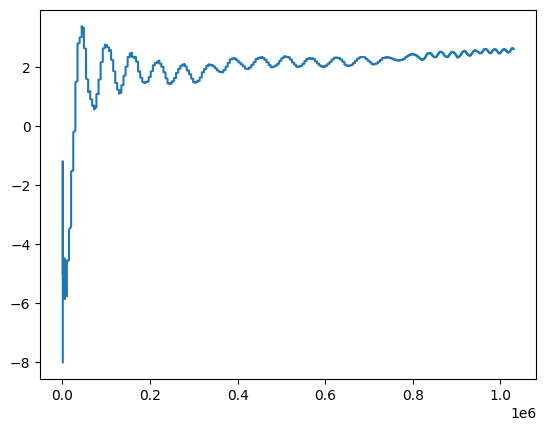

In [41]:
plt.plot(full_city["Średnia temperatura"].expanding().mean())

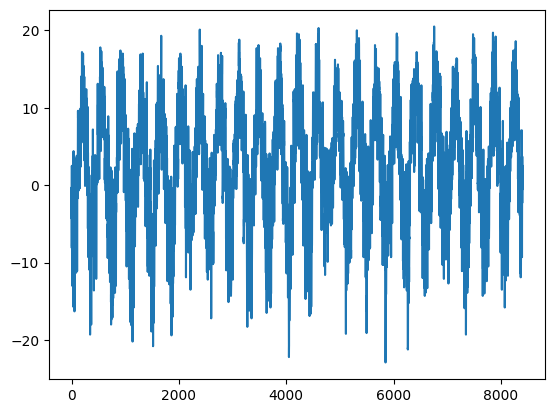

In [44]:
plt.plot(full_city["Średnia temperatura"].reset_index(drop=True))

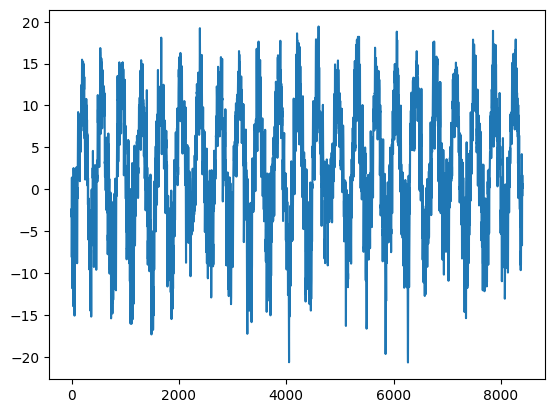

In [42]:
plt.plot(avr_temp)
#plt.figure()

In [72]:
lowest = df["Minimalna temperatura"].min()
highest = df["Maksymalna temperatura"].max()


lowest_temp = df[df["Minimalna temperatura"] == lowest]
lowest_temp = lowest_temp[["Stacja", "Minimalna temperatura", "Dzień", "Miesiąc", "Rok"]]
highest_temp = df[df["Maksymalna temperatura"] == highest]
highest_temp = highest_temp[["Stacja", "Maksymalna temperatura", "Dzień", "Miesiąc", "Rok"]]

In [73]:
lowest_temp

,Stacja,Minimalna temperatura,Dzień,Miesiąc,Rok
870241,JABŁONKA,-37.3,8,1,2017


In [74]:
highest_temp

,Stacja,Maksymalna temperatura,Dzień,Miesiąc,Rok
831911,CEBER,39.0,8,8,2015
